In [1]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
folder_name = 'results/trial'

jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source','o*net-soc_code']).rename(
    columns={'job_zone': 'zone'}
)

In [16]:
#open json file as dataframe
df = pd.read_json(folder_name + "/simllama3.3_no_prompt_results.json", lines=True).dropna()
#merge with jz 
# df = pd.merge(df, jz, how='left', on='title')
df

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[1. Coordinate front-office activities of hote...,0,0.550051,"[[0.713228941, 0.5630971193000001, 0.590073347...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 11, 13, 17, 5, 3, 8, 23, 0, 1, 6, 16, 18, ..."
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[Develop and implement marketing strategies to...,0,0.531516,"[[0.3492152095, 0.22914139930000002, 0.2940952...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 3, 20, 6, 7, 11, 9, 0, 19, 18, 1, 10, 16, ..."
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Designing training programs to improve employ...,0,0.648870,"[[0.7067481279000001, 0.8326070309, 0.71625906...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 4, 0, 8, 7, 11, 6, 3, 2, 10, 9, 5]"
3,Customs Brokers,[Prepare and process import and export documen...,13,[Prepare and submit customs entry documents to...,0,0.580330,"[[0.7682016492, 0.5910642147, 0.518204391, 0.8...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 11, 12, 2, 5, 1, 13, 18, 8, 22, 20, 7, 16,..."
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Inspect government-owned property to ensure c...,0,0.507692,"[[0.5265690088, 0.444504559, 0.4854095578, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[4, 2, 7, 1, 0, 8, 12, 9, 10, 5, 11, 6, 3]"
...,...,...,...,...,...,...,...,...,...
425,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitor and inspect power plant equipment and...,9,0.555895,"[[0.2404494137, 0.723092854, 0.3624368906, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 12, 2, 0, 15, 13, 7, 18, 19, 4, 8, 6, 1..."
426,Nuclear Power Reactor Operators,[Operate nuclear power reactors in accordance ...,51,"[1. Adjust controls to regulate reactor power,...",9,0.582722,"[[0.4352696836, 0.5130941868000001, 0.58313900...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 0, 10, 3, 14, 2, 12, 1, 16, 17, 5, 18, 4, ..."
427,Metal-Refining Furnace Operators and Tenders,"[Regulate supplies of fuel and air, or control...",51,"[Monitor the temperature, pressure, and chemic...",9,0.569541,"[[0.5264048576, 0.648655057, 0.374000400300000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 4, 0, 5, 2, 1, 10, 7, 3, 6, 11, 8, 12, 14,..."
428,Ship Engineers,"[Monitor engine, machinery, or equipment indic...",53,[Perform routine maintenance and repairs on sh...,9,0.557782,"[[0.6980013847000001, 0.4350373745, 0.73759573...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 1, 12, 2, 10, 16, 0, 8, 15, 4, 13, 11, 6, ..."


In [ ]:
def get_result(df):
    score_df = df.groupby("title").agg({
        "perfect_match": "mean",
        "related": "mean",
        "ind": "first"
    }).reset_index()
    #merge with jz
    score_df = score_df.merge(right=jz, left_on="title", right_on="title")
    return score_df

Text(0.5, 1.0, 'mean similarity score by title')

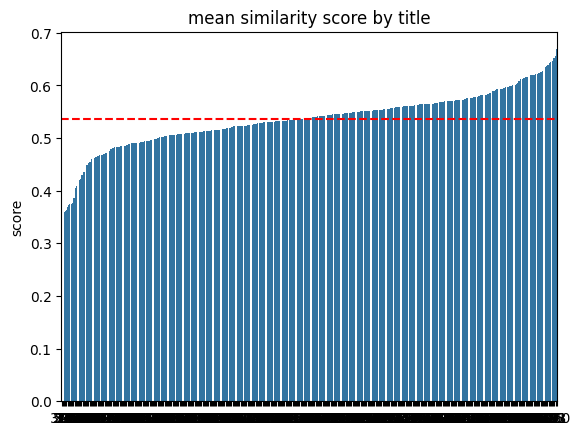

In [13]:
mean_score = df["score"]
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by title")

Text(0.5, 1.0, 'mean similarity score by industry')

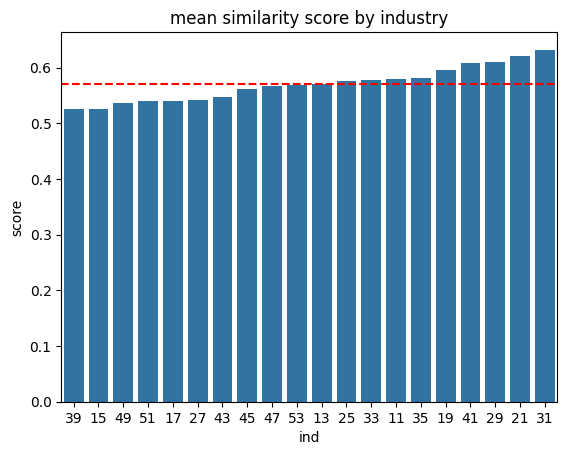

In [136]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

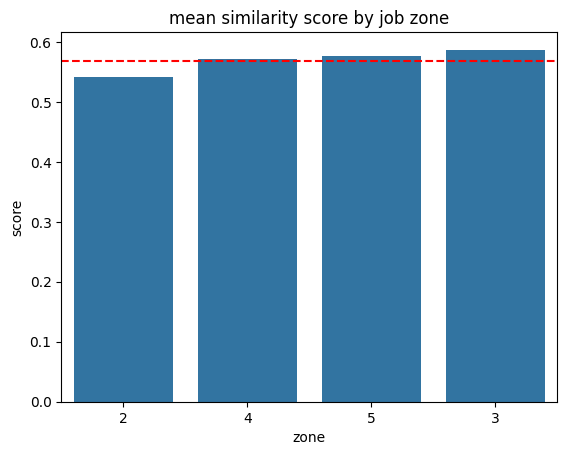

In [137]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [138]:
max_similarity = df[df["score"] == df["score"].max()]
max_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone
230,"Business Teachers, Postsecondary",[Prepare and deliver lectures to undergraduate...,25,[advise students on academic and vocational cu...,5,0.797485,"[[0.3582337499, 0.3667060435, 0.295165658, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16, 7, 8, 17, 9, 15, 10, 3, 2, 11, 1, 0, 23, ...",25-1011.00,5


Text(0.5, 1.0, 'similarity matrix of Business Teachers, Postsecondary')

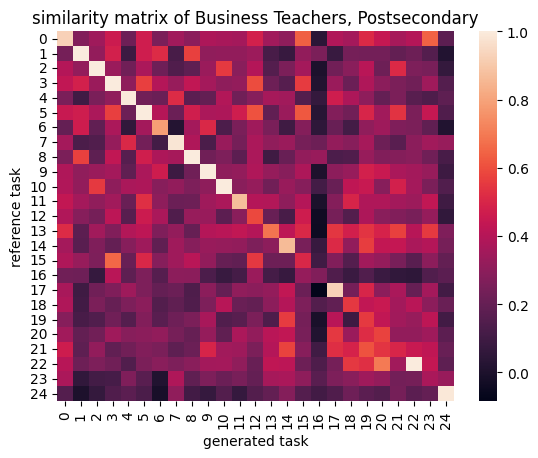

In [139]:
x = max_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [140]:
min_similarity = df[df["score"] == df["score"].min()]
min_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone
165,"Molders, Shapers, and Casters, Except Metal an...",[Read work orders or examine parts to determin...,51,"[Issue raw materials to production workers., R...",3,0.358453,"[[0.400046885, 0.5646982193, 0.4147915542, 0.4...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 19, 5, 18, 10, 8, 7, 17, 2, 13, 16, 20, 12...",51-9195.00,2


Text(0.5, 1.0, 'similarity matrix of Molders, Shapers, and Casters, Except Metal and Plastic')

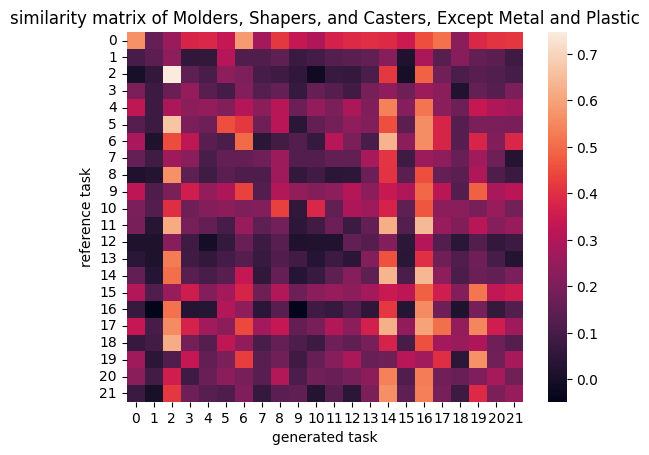

In [141]:
x = min_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [142]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



In [143]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [144]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 230 with score 6.5800025762


In [156]:
# get the row with the best rearranged matrix
print(df_test.loc[index]["ref_task"])
print(df_test.loc[index]["gen_task"])
print(df_test.loc[index]["score"])


['Prepare and deliver lectures to undergraduate or graduate students on topics such as financial accounting, principles of marketing, and operations management.', "Evaluate and grade students' class work, assignments, and papers.", 'Initiate, facilitate, and moderate classroom discussions.', 'Prepare course materials, such as syllabi, homework assignments, and handouts.', 'Keep abreast of developments in the field by reading current literature, talking with colleagues, and participating in professional organizations and conferences.', 'Plan, evaluate, and revise curricula, course content, and course materials and methods of instruction.', 'Maintain student attendance records, grades, and other required records.', 'Conduct research in a particular field of knowledge and publish findings in professional journals, books, or electronic media.', 'Compile, administer, and grade examinations, or assign this work to others.', 'Maintain regularly scheduled office hours to advise and assist stud

Text(0.5, 1.0, 'similarity matrix of Business Teachers, Postsecondary')

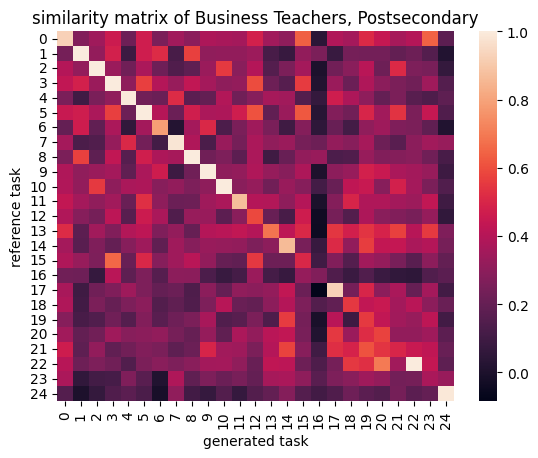

In [145]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [160]:
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
df_test = calculate_similarity(df_test)
df_test

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[1. Coordinate front-office activities of hote...,0,0.550051,"[[0.713228941, 0.5630971193000001, 0.590073347...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 11, 13, 17, 5, 3, 8, 23, 0, 1, 6, 16, 18, ...",11-9081.00,4,"[[0.7508575916, 0.5942677855, 0.54789072280000...",0.550051,0.330226,0.219825
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[Develop and implement marketing strategies to...,0,0.531516,"[[0.3492152095, 0.22914139930000002, 0.2940952...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 3, 20, 6, 7, 11, 9, 0, 19, 18, 1, 10, 16, ...",11-9179.02,3,"[[0.6021389961, 0.2011715323, 0.3788129389, 0....",0.531516,0.284702,0.246814
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Designing training programs to improve employ...,0,0.648870,"[[0.7067481279000001, 0.8326070309, 0.71625906...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 4, 0, 8, 7, 11, 6, 3, 2, 10, 9, 5]",11-3131.00,4,"[[0.8326070309, 0.6868743896, 0.70674812790000...",0.648870,0.473658,0.175212
3,Customs Brokers,[Prepare and process import and export documen...,13,[Prepare and submit customs entry documents to...,0,0.580330,"[[0.7682016492, 0.5910642147, 0.518204391, 0.8...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 11, 12, 2, 5, 1, 13, 18, 8, 22, 20, 7, 16,...",13-1041.08,3,"[[0.8145998716, 0.6097154021, 0.33242908120000...",0.580330,0.355638,0.224692
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Inspect government-owned property to ensure c...,0,0.507692,"[[0.5265690088, 0.444504559, 0.4854095578, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[4, 2, 7, 1, 0, 8, 12, 9, 10, 5, 11, 6, 3]",13-1041.04,3,"[[0.5593031645000001, 0.4854095578, 0.43245270...",0.507692,0.342465,0.165227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitor and inspect power plant equipment and...,9,0.555895,"[[0.2404494137, 0.723092854, 0.3624368906, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 12, 2, 0, 15, 13, 7, 18, 19, 4, 8, 6, 1...",51-8013.00,2,"[[0.723092854, 0.094090119, 0.4549439251000000...",0.555895,0.319041,0.236854
426,Nuclear Power Reactor Operators,[Operate nuclear power reactors in accordance ...,51,"[1. Adjust controls to regulate reactor power,...",9,0.582722,"[[0.4352696836, 0.5130941868000001, 0.58313900...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 0, 10, 3, 14, 2, 12, 1, 16, 17, 5, 18, 4, ...",51-8011.00,3,"[[0.6274795532, 0.4352696836, 0.3303284943, 0....",0.582722,0.357246,0.225476
427,Metal-Refining Furnace Operators and Tenders,"[Regulate supplies of fuel and air, or control...",51,"[Monitor the temperature, pressure, and chemic...",9,0.569541,"[[0.5264048576, 0.648655057, 0.374000400300000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 4, 0, 5, 2, 1, 10, 7, 3, 6, 11, 8, 12, 14,...",51-4051.00,2,"[[0.6547672749, 0.1969602704, 0.5264048576, 0....",0.569541,0.372224,0.197317
428,Ship Engineers,"[Monitor engine, machinery, or equipment indic...",53,[Perform routine maintenance and repairs on sh...,9,0.557782,"[[0.6980013847000001, 0.4350373745, 0.73759573...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 1, 12, 2, 10, 16, 0, 8, 15, 4, 13, 11, 6, ...",53-5031.00,3,"[[0.7379598022, 0.4350373745, 0.398155421, 0.7...",0.557782,0.348100,0.209683


In [161]:
df_test[df_test["diagonal_similarity"] == df_test["diagonal_similarity"].max()]

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
230,"Business Teachers, Postsecondary",[Prepare and deliver lectures to undergraduate...,25,[advise students on academic and vocational cu...,5,0.797485,"[[0.3582337499, 0.3667060435, 0.295165658, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16, 7, 8, 17, 9, 15, 10, 3, 2, 11, 1, 0, 23, ...",25-1011.00,5,"[[0.9245157838, 0.2723463178, 0.3463859856, 0....",0.797485,0.276848,0.520637


In [117]:
max_difference = df_test[df_test["difference"] == df_test["difference"].max()]
max_difference

KeyError: 'difference'

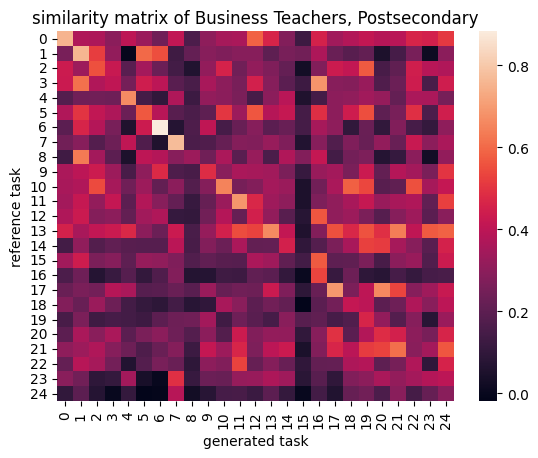

In [36]:
x = max_difference.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

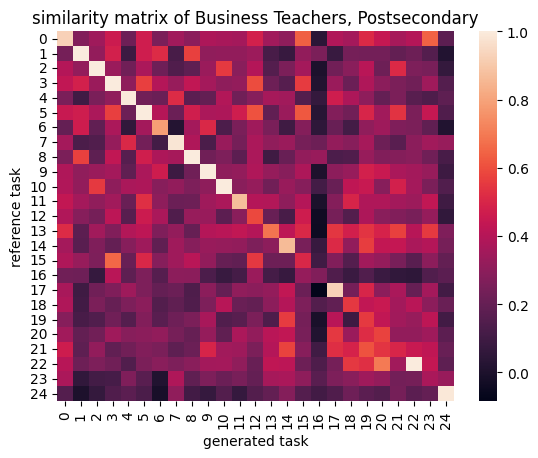

In [164]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [20]:
mean = df["score"].mean()
np.save(folder_name + "/score.npy", mean)

<function matplotlib.pyplot.show(close=None, block=None)>

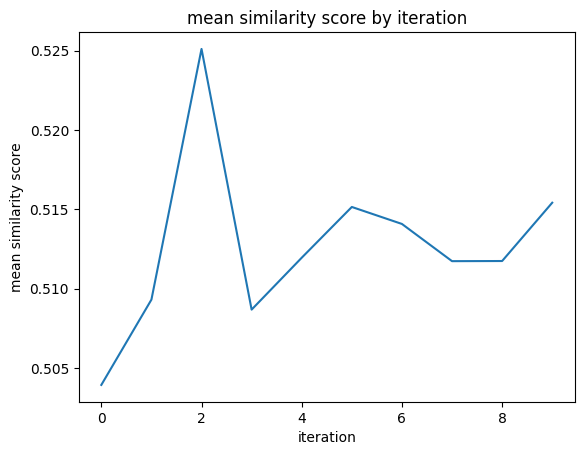

In [59]:
# Group the df by iteration and calculate the mean score of the score column
df_grouped = df.groupby("iteration")["score"].mean()
#plot the series using column chat
sns.lineplot(df_grouped)
plt.title("mean similarity score by iteration")
plt.xlabel("iteration")
plt.ylabel("mean similarity score")
plt.show


In [4]:
# load all the json files in the folder
import os
import json
import re
import numpy as np  
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

In [ ]:
# rearrange the matrix based on the best gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#for a rearranged matrix, calculate two things. 1 is the mean similarity of the diagonal, and 2 the mean similarity of the off-diagonal
def calculate_diagonal_similarity(rearranged_matrix):
    return np.mean(np.diag(rearranged_matrix))

def calculate_off_diagonal_similarity(rearranged_matrix):
    off_diagonal = np.abs(rearranged_matrix) - np.diag(np.abs(np.diag(rearranged_matrix)))
    return np.mean(off_diagonal)

#package to a function for later use
def calculate_similarity(df):
    #create a df dropping the rows with matrix shape not equal to (x, x)
    df = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
    #define a function to rearrange matrix based on gen_order
    df = df.copy()
    df.loc[:, "rearranged_matrix"] = df.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)
    #apply the functions to new column diagonal_similarity and off_diagonal_similarity
    df = df.copy()
    df.loc[:, "diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_diagonal_similarity)
    df = df.copy()
    df.loc[:, "off_diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_off_diagonal_similarity)
    # add a column to the df that is the difference between the two
    df["difference"] = df["diagonal_similarity"] - df["off_diagonal_similarity"]
    return df

def join_iteration(df):
    df = df.groupby(["title", "ind"], group_keys=False).apply(lambda x: pd.Series({
        "score": np.array(x["score"]),
        "diagonal_similarity": np.array(x["diagonal_similarity"]),
        "off_diagonal_similarity": np.array(x["off_diagonal_similarity"]),
        "difference": np.array(x["difference"])
    })).reset_index()
    return df

def mean_difference_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["difference"].mean().to_numpy()

def mean_max_diagnonal_similarity(df):
    #get the mean max diagonal similarity in df, by iteration, into a np array
    return df.groupby("iteration")["diagonal_similarity"].max().to_numpy()

In [92]:
folder_name = 'results/trial'

jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source']).rename(
    columns={'o*net-soc_code': 'code', 'job_zone': 'zone'}
)

json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
model_name = [json_file[3:-13] for json_file in json_files]

dia_list = []
maxd_list = []
# Loop through each JSON file and load it into the DataFrame
for json_file in json_files:
    df = pd.read_json(os.path.join(folder_name, json_file), lines=True).dropna()
    df = df.drop(columns=["score"], axis=1)
    #create a column for mean of matrix
    df["score"] = df["matrix"].apply(lambda x: np.mean(x))
    df = calculate_similarity(df)
    maxd = mean_difference_array(df)
    dia = mean_max_diagnonal_similarity(df)
    dia_list.append(dia)
    maxd_list.append(maxd)

print(dia_list)
print(maxd_list)

[array([0.59133676, 0.60859195, 0.56759149, 0.58335782, 0.57801311,
       0.59846865, 0.61688381, 0.61473903, 0.6368468 , 0.59253546]), array([0.55636708, 0.62365916, 0.60198109, 0.59831268, 0.61852016,
       0.61600556, 0.59781476, 0.63427253, 0.57950519, 0.56959124]), array([0.6830554 , 0.6649044 , 0.65960144, 0.75224674, 0.68249246,
       0.79748506, 0.76277993, 0.68691866, 0.70379874, 0.67229349]), array([0.65651057, 0.65252548, 0.6595945 , 0.68880604, 0.66466909,
       0.64606252, 0.64050039, 0.67903696, 0.65396526, 0.69577517]), array([0.6515674 , 0.63454109, 0.64300914, 0.64422636, 0.64130084,
       0.64449499, 0.64155139, 0.64915347, 0.66195511, 0.65825142]), array([0.65642363, 0.63892077, 0.64639187, 0.65177458, 0.62578357,
       0.63131414, 0.66850928, 0.65231388, 0.64452682, 0.62805355])]
[array([0.17500321, 0.180643  , 0.17442343, 0.17764547, 0.16464126,
       0.1744129 , 0.16784658, 0.18092869, 0.16803211, 0.16513894]), array([0.1779834 , 0.18499749, 0.16949533, 0.1

In [111]:
x = 4
df = pd.read_json(os.path.join(folder_name, json_files[x]), lines=True).dropna()
df = df.drop(columns=["score"], axis=1)
#create a column for mean of matrix
df["score"] = df["matrix"].apply(lambda x: np.mean(x))
#drop the score column
df= calculate_similarity(df)
df = df.groupby(["title"], group_keys=False).agg({
    "ind": "first",
    "score": "mean",
    "diagonal_similarity": "mean",
    "off_diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index()
df = df.merge(jz, on="title", how="left")
print(json_files[x])
df.describe()[["score", "diagonal_similarity", "difference"]].iloc[1:3]

simmistral_no_prompt_results.json


,score,diagonal_similarity,difference
mean,0.368863,0.542985,0.205393
std,0.057262,0.049787,0.033958


In [97]:
#group the df by ind
df_grouped = df.groupby("ind").agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "off_diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index()
print(df_grouped.sort_values("score", ascending=False).iloc[:3]["ind"].values)
print(df_grouped.sort_values("diagonal_similarity", ascending=False).iloc[:3]["ind"].values)
print(df_grouped.sort_values("difference", ascending=False).iloc[:3]["ind"].values)

[31 33 45]
[31 21 29]
[25 35 21]


In [98]:
#group the df by ind
df_grouped = df.groupby("zone").agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "off_diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index()
print(df_grouped.sort_values("score", ascending=False)["zone"].values)
print(df_grouped.sort_values("diagonal_similarity", ascending=False)["zone"].values)
print(df_grouped.sort_values("difference", ascending=False)["zone"].values)

[4 3 5 2]
[3 5 4 2]
[5 3 2 4]


Descriptive Statistics:
deepseek-r1_no_prompt: Mean = 0.5988, Variance = 0.0004
deepseek-r1_prompt1: Mean = 0.5996, Variance = 0.0006
llama3.3_no_prompt: Mean = 0.7066, Variance = 0.0020
llama3.3_prompt1: Mean = 0.6637, Variance = 0.0003
mistral_no_prompt: Mean = 0.6470, Variance = 0.0001
mistral_prompt1: Mean = 0.6444, Variance = 0.0002

Levene's Test for Equal Variances: p-value = 0.0302

ANOVA Results:
F-statistic: 25.7282
p-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference between the groups.


C:\Users\godfr\AppData\Local\Temp\ipykernel_33576\3916728283.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


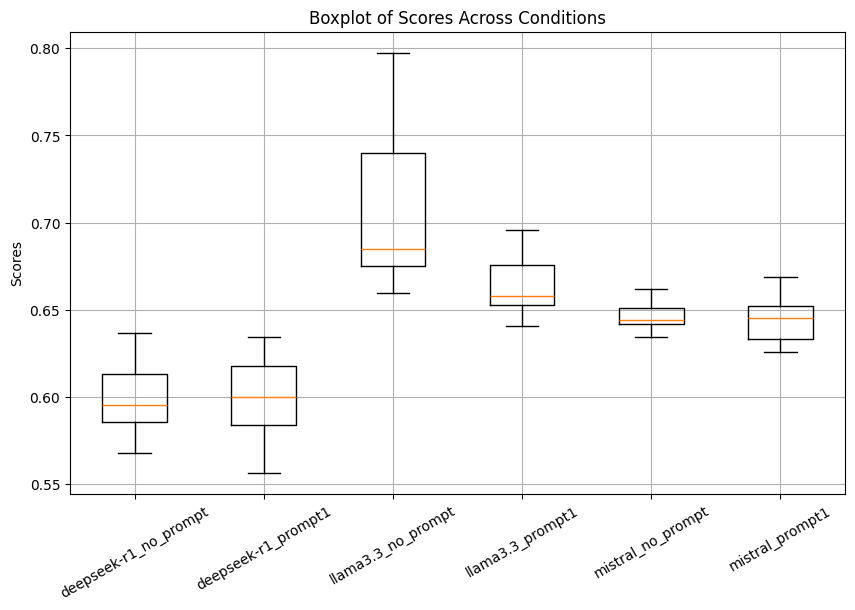

In [93]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = dia_list
labels = model_name

# Descriptive stats
print("Descriptive Statistics:")
for label, group in zip(labels, groups):
    print(f"{label}: Mean = {np.mean(group):.4f}, Variance = {np.var(group):.4f}")

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(*groups)
print(f"\nLevene's Test for Equal Variances: p-value = {levene_p:.4f}")
if levene_p < 0.05:
    print("Warning: Variances may not be equal (p < 0.05). Consider a robust alternative if significant.")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(10, 6))
plt.boxplot(groups, labels=labels)
plt.ylabel('Scores')
plt.title('Boxplot of Scores Across Conditions')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

In [69]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine data for Tukey HSD
all_data = np.concatenate(groups)
group_labels = np.concatenate([[label] * 10 for label in labels])

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=all_data, groups=group_labels, alpha=0.05)
print("\nTukey HSD Post-Hoc Test:")
print(tukey)


Tukey HSD Post-Hoc Test:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1               group2       meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
deepseek-r1_no_prompt deepseek-r1_prompt1   0.0008    1.0 -0.0328  0.0344  False
deepseek-r1_no_prompt  llama3.3_no_prompt   0.1077    0.0  0.0741  0.1413   True
deepseek-r1_no_prompt    llama3.3_prompt1   0.0649    0.0  0.0313  0.0985   True
deepseek-r1_no_prompt   mistral_no_prompt   0.0482 0.0012  0.0146  0.0818   True
deepseek-r1_no_prompt     mistral_prompt1   0.0456 0.0025   0.012  0.0792   True
  deepseek-r1_prompt1  llama3.3_no_prompt    0.107    0.0  0.0734  0.1406   True
  deepseek-r1_prompt1    llama3.3_prompt1   0.0641    0.0  0.0305  0.0977   True
  deepseek-r1_prompt1   mistral_no_prompt   0.0474 0.0015  0.0138   0.081   True
  deepseek-r1_prompt1     mistral_prompt1   0.0448 0.0031  0.0112  0.0784   True
  

In [45]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import FTestAnovaPower

# Group all data
groups = the_list
labels = model_name
print("Diagonal /Off diagonal Difference")

# Run ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# Calculate effect size (η²)
n_total = len(groups[0]) * len(groups)  # Total observations (10 * 6 = 60)
k = len(groups)  # Number of groups (6)
df_between = k - 1  # Degrees of freedom between groups (5)
df_within = n_total - k  # Degrees of freedom within groups (54)
eta_squared = (f_stat * df_between) / (f_stat * df_between + df_within)
print(f"Effect Size (η²): {eta_squared:.4f}")

# Convert η² to Cohen's f
cohen_f = np.sqrt(eta_squared / (1 - eta_squared))
print(f"Cohen's f: {cohen_f:.4f}")

# Power analysis
power_analysis = FTestAnovaPower()
alpha = 0.05  # Significance level
power = 0.8   # Desired power

# Check if Cohen's f is valid
if cohen_f <= 0 or np.isnan(cohen_f):
    raise ValueError("Invalid effect size for power analysis. Check ANOVA results.")

# Calculate required sample size per group
sample_size = power_analysis.solve_power(effect_size=cohen_f, nobs=None, alpha=alpha, power=power, k_groups=k)
print(f"Required sample size per group: {int(np.ceil(sample_size))} runs (for power = {power}, alpha = {alpha})")

# Optional: Descriptive stats
print("\nDescriptive Statistics:")
for label, group in zip(labels, groups):
    print(f"{label}: Mean = {np.mean(group):.4f}, SD = {np.std(group, ddof=1):.4f}")

Diagonal /Off diagonal Difference
ANOVA F-statistic: 252.3055, p-value: 0.0000
Effect Size (η²): 0.9590
Cohen's f: 4.8334
Required sample size per group: 60 runs (for power = 0.8, alpha = 0.05)

Descriptive Statistics:
deepseek-r1_no_prompt: Mean = 0.1729, SD = 0.0061
deepseek-r1_prompt1: Mean = 0.1736, SD = 0.0063
llama3.3_no_prompt: Mean = 0.2221, SD = 0.0038
llama3.3_prompt1: Mean = 0.2155, SD = 0.0029
mistral_no_prompt: Mean = 0.2054, SD = 0.0016
mistral_prompt1: Mean = 0.2027, SD = 0.0014


c:\Users\godfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\power.py:524: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\godfr\AppData\Local\Temp\ipykernel_18244\599684500.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Required sample size per group: {int(np.ceil(sample_size))} runs (for power = {power}, alpha = {alpha})")


### considering within model only

In [72]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestPower


llama3_3_no_prompt = the_list[4] 
llama3_3_prompt1 = the_list[5]  

# Paired t-test (H1: Prompt1 > No Prompt)
t_stat, p_value_two_tailed = stats.ttest_rel(llama3_3_prompt1, llama3_3_no_prompt)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)
print("Paired t-test (Prompt1 > No Prompt):")
print(f"t-statistic: {t_stat:.4f}, p-value (one-tailed): {p_value_one_tailed:.4f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed < alpha and np.mean(llama3_3_prompt1) > np.mean(llama3_3_no_prompt):
    print("Result: Reject H₀. Prompt1 significantly improves scores.")
else:
    print("Result: Fail to reject H₀. Prompt1 does not significantly improve scores.")

# Cohen's d (for paired data)
diffs = llama3_3_prompt1 - llama3_3_no_prompt
cohen_d = np.mean(diffs) / np.std(diffs, ddof=1)
print(f"Cohen's d: {cohen_d:.4f}")

# Power analysis (paired t-test)
power_analysis = TTestPower()
sample_size = power_analysis.solve_power(effect_size=abs(cohen_d), nobs=None, alpha=alpha, power=0.8, alternative='larger')
print(f"Required sample size (runs): {int(np.ceil(sample_size))} (for power = 0.8, alpha = 0.05)")

Paired t-test (Prompt1 > No Prompt):
t-statistic: -0.5032, p-value (one-tailed): 0.6865
Result: Fail to reject H₀. Prompt1 does not significantly improve scores.
Cohen's d: -0.1591
Required sample size (runs): 246 (for power = 0.8, alpha = 0.05)
